# <center>🏆 Soccer_Analytics_visualization ⚽</center>



In [1]:
!pip install statsbombpy
!pip install mplsoccer

import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch, Radar, FontManager
import pandas as pd
from statsbombpy import sb

  Using cached more_itertools-10.6.0-py3-none-any.whl.metadata (37 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 173.8 kB/s eta 0:00:00m eta 0:00:010:00:03
Using cached more_itertools-10.6.0-py3-none-any.whl (63 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 190.9 kB/s eta 0:00:00m eta 0:00:010:00:03
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 228.9 kB/s eta 0:00:000:00:01m eta 0:00:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 255.5 kB/s eta 0:00:00m eta 0:00:010:02:03
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 242.5 kB/s eta 0:00:00m eta 0:00:010:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 245.3 kB/s eta 0:00:001m247.0 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 238.9 kB/s eta 0:00:001m244.1 kB/s eta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)


Matplotlib is building the font cache; this may take a moment.


In [2]:
import numpy as np

# 🏆 Competition data
Using method *competition* of the parser we can explore competitions to find the competition we are interested in.
The most important information for us is in the *competition_id* (id of competition) and *season_id*.
The first one is the key in Statsbomb database of a competition, the second one of a season
of this competition (for example WC 2018 would have a different *season_id* than WC 2014, but the same *competition_id*).

In [3]:
parser = Sbopen()

In [4]:
#opening data using competition method
df_competition = parser.competition()
#structure of data
df_competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             74 non-null     int64 
 1   season_id                  74 non-null     int64 
 2   country_name               74 non-null     object
 3   competition_name           74 non-null     object
 4   competition_gender         74 non-null     object
 5   competition_youth          74 non-null     bool  
 6   competition_international  74 non-null     bool  
 7   season_name                74 non-null     object
 8   match_updated              74 non-null     object
 9   match_updated_360          56 non-null     object
 10  match_available_360        10 non-null     object
 11  match_available            74 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 6.1+ KB


### 🧭 After exploring the data we have found tha FIFA World Cup Had a Competition_Id =43, Season_id = 106

In [5]:
#opening data using match method
df_match = parser.match(competition_id=43, season_id=106)


In [6]:
df_competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


## ⚽ Match data
Using method *match* of the parser we can explore matches of a competition to find the match we are interested in.
To open it we need to know the *competition_id* (id of competition) and *season_id*.
We know that for Fifa World Cup 22 *competition_id* is 43 and *season_id* is 106
From this dataframe for us the most important imformation is provided in *match_id*,
*home_team_id* and *home_team_name* and adequately *away_team_id* and *away_team_name*.

In [8]:
df_match

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3857256,2022-12-02,2022-12-02 21:00:00,2,3,available,available,2023-02-17 23:45:15.306706,2023-04-26 23:49:58.956186,3,...,10,Group Stage,1001115,Stadium 974,185,Qatar,1121.0,Fernando Andrés Rapallini,11.0,Argentina
1,3869151,2022-12-03,2022-12-03 21:00:00,2,1,available,available,2023-07-30 07:46:05.382784,2023-07-30 07:48:51.865595,4,...,33,Round of 16,1000793,Ahmad bin Ali Stadium,185,Qatar,367.0,Szymon Marciniak,182.0,Poland
2,3857257,2022-11-30,2022-11-30 17:00:00,1,0,available,available,2023-04-28 17:13:10.958725,2023-06-20 11:04:37.638969,3,...,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,2311.0,Mustapha Ghorbal,4.0,Algeria
3,3857258,2022-11-24,2022-11-24 21:00:00,2,0,available,available,2023-06-24 17:17:27.911026,2023-07-11 14:56:31.096588,1,...,10,Group Stage,1001114,Lusail Stadium,185,Qatar,741.0,Alireza Faghani,107.0,"Iran, Islamic Republic of"
4,3857288,2022-11-26,2022-11-26 12:00:00,0,1,available,available,2023-02-28 21:25:20.888552,2023-04-27 00:30:07.835815,2,...,10,Group Stage,117897,Al Janoub Stadium,185,Qatar,225.0,Daniel Siebert,85.0,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3857265,2022-11-22,2022-11-22 18:00:00,0,0,available,available,2023-04-19 06:53:07.045195,2023-04-27 00:49:30.005344,1,...,10,Group Stage,1001115,Stadium 974,185,Qatar,1701.0,Chris Beath,14.0,Australia
60,3857262,2022-12-02,2022-12-02 17:00:00,2,1,available,available,2023-03-17 22:58:19.035038,2023-04-26 23:48:08.999798,3,...,10,Group Stage,94425,Education City Stadium,185,Qatar,1094.0,Facundo Tello Figueroa,11.0,Argentina
61,3857261,2022-11-29,2022-11-29 21:00:00,0,3,available,available,2023-03-27 07:45:00.892102,2023-04-27 00:02:44.241621,3,...,10,Group Stage,1000793,Ahmad bin Ali Stadium,185,Qatar,943.0,Slavko Vinčić,208.0,Slovenia
62,3857255,2022-12-01,2022-12-01 21:00:00,2,1,available,available,2023-03-30 12:03:47.965683,2023-04-26 23:51:48.352990,3,...,10,Group Stage,1000253,Sheikh Khalifa International Stadium,185,Qatar,2366.0,Victor Miguel de Freitas Gomes,211.0,South Africa


### Fifa Worldcup Final 2022


| Match                | Match_ID |
|----------------------|----------|
| FIFA WC Final 2022   | 3869685  |

### Let's create a football pitch using [MPLsoccer]

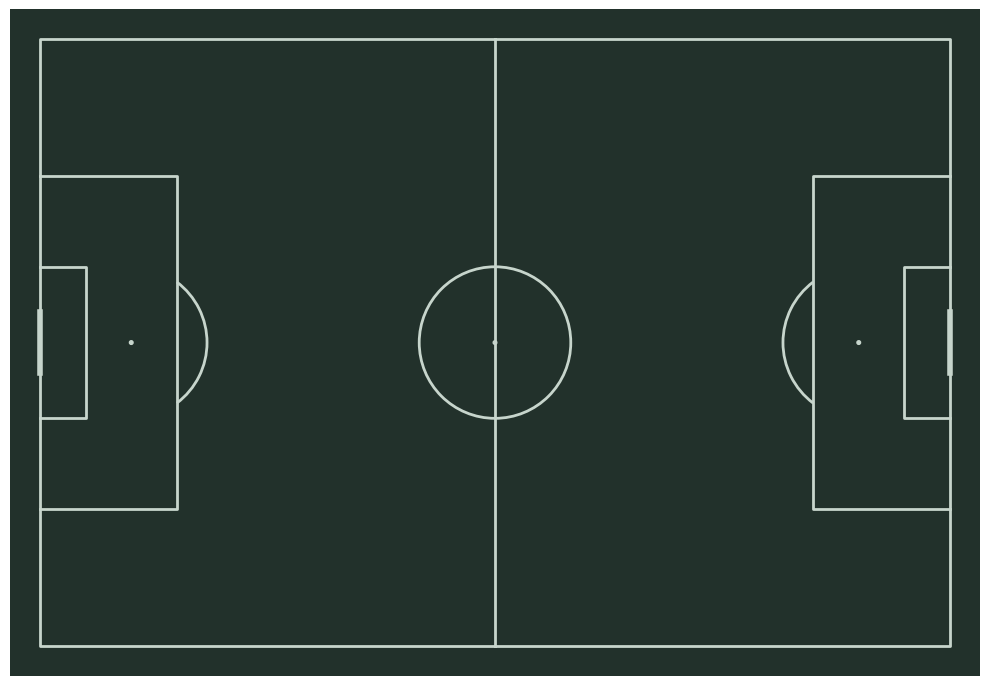

In [11]:
# Create a pitch object
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7))
fig.savefig("./Outputs/pitch.png", dpi=300, bbox_inches="tight")

## 📝 Lineup data
To check the lineups we use the *lineup* method. We do it for Argentina vs France WC 2022 game - *game_id* is 3869685
- you can check that in the df_match. In this dataframe you will find all players who played in this game, their teams
and jersey numbers


In [8]:
#opening data using match method
df_lineup = parser.lineup(3869685)
#structure of data
df_lineup

,player_id,player_name,player_nickname,jersey_number,match_id,team_id,team_name,country_id,country_name
0,2972,Marcus Thuram,Marcus Thuram,26,3869685,771,France,78,France
1,3009,Kylian Mbappé Lottin,Kylian Mbappé,10,3869685,771,France,78,France
2,3026,Adrien Rabiot,Adrien Rabiot,14,3869685,771,France,78,France
3,3099,Hugo Lloris,Hugo Lloris,1,3869685,771,France,78,France
4,3379,Alphonse Areola,Alphonse Areola,23,3869685,771,France,78,France
5,3543,Steve Mandanda,Steve Mandanda,16,3869685,771,France,78,France
6,3604,Olivier Giroud,Olivier Giroud,9,3869685,771,France,78,France
7,4445,Jules Koundé,Jules Koundé,5,3869685,771,France,78,France
8,5476,Benjamin Pavard,Benjamin Pavard,2,3869685,771,France,78,France
9,5477,Ousmane Dembélé,Ousmane Dembélé,11,3869685,771,France,78,France


# 🔎 Event data
Knowing *match_id* you can open all the events that occured on the pitch
In the event dataframe you will find events with additional information, we will mostly use this dataframe.
Tactics dataframe provides information about player position on the pitch. 'Related' dataframe provides information
on events that were related to each other - for example ball pass and pressure applied. *df_freeze* consists of freezed
frames with player position in the moment of shots. We will learn more about tracking data later in the course.
Below, an example of event data is presented.

### Opening the dataset
The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.
Using method *event* and putting the id of the game as a parameter we load the data.
The event data, which we will mostly focus on,
is stored in a dataframe *df*. From this dataframe we take out the names of the two teams.
Then, we filter the dataframe so that only shots are left.

In [ ]:
df, related, freeze, tactics = parser.event(3869685)
#get team names
team1, team2 = df.team_name.unique()

# Merge the dataframes based on player ID before creating 'shots'
df = pd.merge(df, df_lineup[['player_id', 'player_nickname']], on='player_id', how='left')

# Now create the 'shots' DataFrame with 'player_nickname' included
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

# Now you can access 'player_name' and 'player_nickname' columns from 'shots'
print(shots[['player_name', 'player_nickname']])

### Making the shot map using iterative solution
Now, we iterate through all the shots in the match. We take *x* and *y* coordinates, the team name and information
if goal was scored. If It was scored, we plot a solid circle with a name of the player, if not, we plot a
transculent circle (parameter alpha tunes the transcluency).
To have Argentina's shots on one half and France shots on the other half,
we subtract *x* and *y* from the pitch length and height.

Football data tends to be attacking left to right, and we will use this as default in the course.

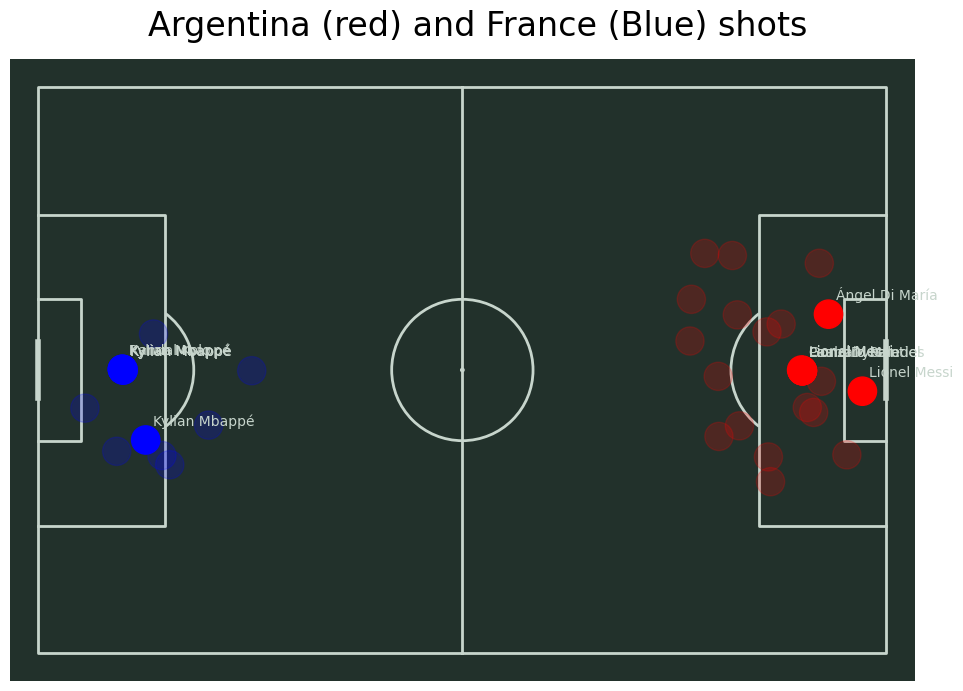

In [12]:

# Create a pitch object
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7))
#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80
#Plot the shots by looping through them.
for i,shot in shots.iterrows():
    #get the information
    x=shot['x']
    y=shot['y']
    goal=shot['outcome_name']=='Goal'
    team_name=shot['team_name']
    #set circlesize
    circleSize=2
    #plot Argentina
    if (team_name==team1):
        if goal:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            plt.text(x+1,y-2,shot['player_nickname'], color = "#c7d5cc")
        else:
            shotCircle=plt.Circle((x,y),circleSize,color="red")
            shotCircle.set_alpha(.2)
    #plot France
    else:
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            plt.text(pitchLengthX-x+1,pitchWidthY - y - 2 ,shot['player_nickname'], color = "#c7d5cc")
        else:
            shotCircle=plt.Circle((pitchLengthX-x,pitchWidthY - y),circleSize,color="blue")
            shotCircle.set_alpha(.2)
    ax.add_patch(shotCircle)
#set title
fig.suptitle("Argentina (red) and France (Blue) shots", fontsize = 24)
fig.set_size_inches(10, 7)
# Save the figure
fig.savefig("./Outputs/shot_plot.png", dpi=300, bbox_inches="tight")
plt.show()

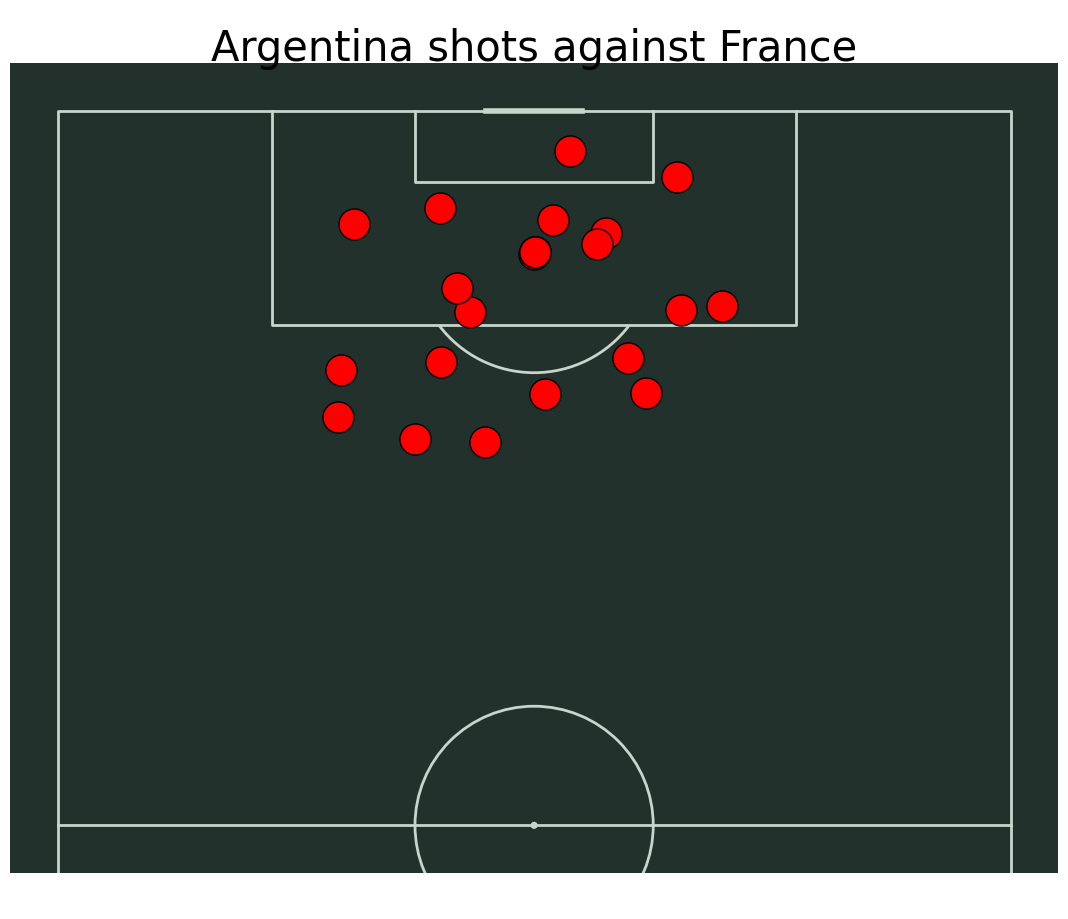

In [15]:
#query
mask_argentina = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_argentina = df.loc[mask_argentina, ['x', 'y', 'outcome_name', "player_nickname"]]
pitch = VerticalPitch(pitch_color='#22312b',line_color='#c7d5cc', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_argentina.x, df_argentina.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'], edgecolors="black")
fig.suptitle("Argentina shots against France", fontsize = 30)
# Save the figure
fig.savefig("./Outputs/argentina_shots.png", dpi=300, bbox_inches="tight")

plt.show()

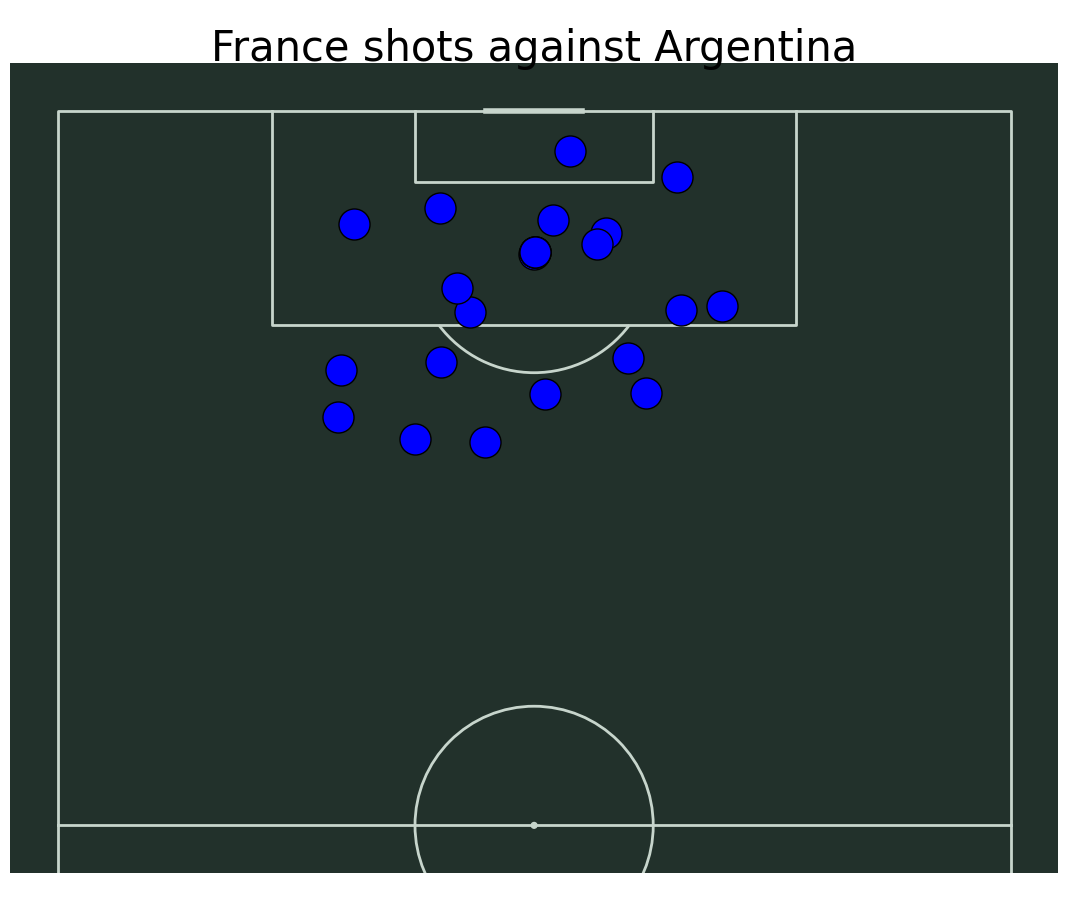

In [16]:
#query
mask_France = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_France = df.loc[mask_France, ['x', 'y', 'outcome_name', "player_nickname"]]
pitch = VerticalPitch(pitch_color='#22312b',line_color='#c7d5cc', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
pitch.scatter(df_France.x, df_France.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'], edgecolors="black")
fig.suptitle("France shots against Argentina", fontsize = 30)
# Save the figure
fig.savefig("./Outputs/france_shots.png", dpi=300, bbox_inches="tight")
plt.show()

# 🎯 Plotting passes

Making a pass map using Statsbomb data

In [17]:
import pathlib
import os
import pandas as pd
import json

### Making the pass map using iterative solution
Draw the pitch and iterate through the passes. We check if a pass was made by Lucy Bronze. If so, we take the starting coordinates of a pass and plot a circle. Then we subtract the coordinates beginning of the pass from the end of passes in order to draw pass arrows.

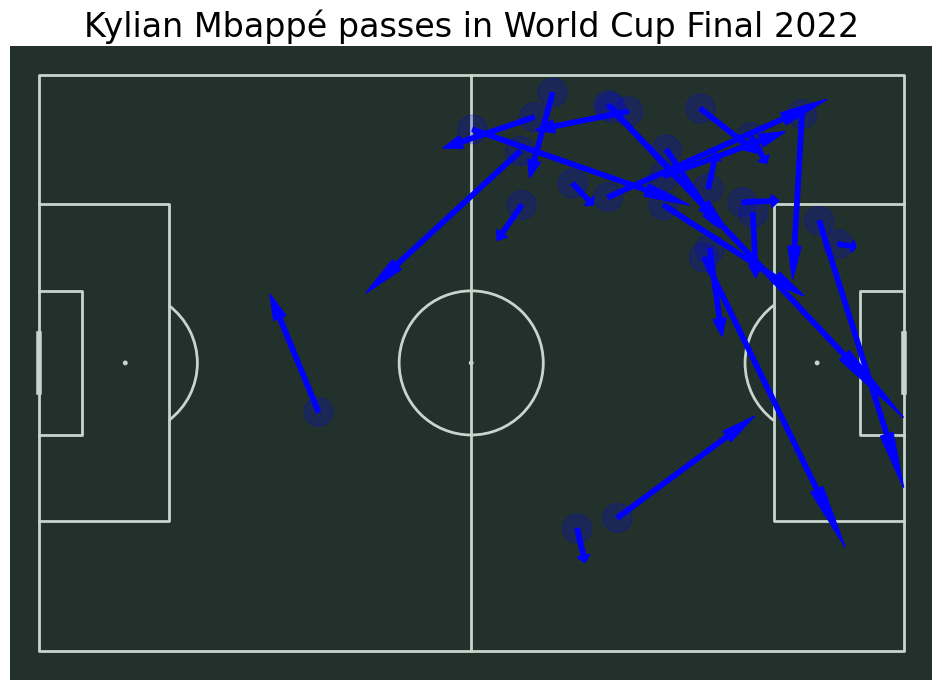

In [27]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

# Create a pitch object
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7))

#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

for i, thepass in passes.iterrows():
    #if pass made by Kylian Mbappé Lottin
    if thepass['player_name'] == 'Kylian Mbappé Lottin':
        x = thepass['x']
        y = thepass['y']
        #plot circle
        passCircle = plt.Circle((x, y), 2, color="blue")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx = thepass['end_x'] - x
        dy = thepass['end_y'] - y
        #plot arrow
        passArrow = plt.Arrow(x, y, dx, dy, width=3, color="blue")
        ax.add_patch(passArrow)

ax.set_title("Kylian Mbappé passes in World Cup Final 2022", fontsize=24)
fig.set_size_inches(10, 7)
# Save the figure
fig.savefig("./Outputs/mbappe_passes.png", dpi=300, bbox_inches="tight")
plt.show()

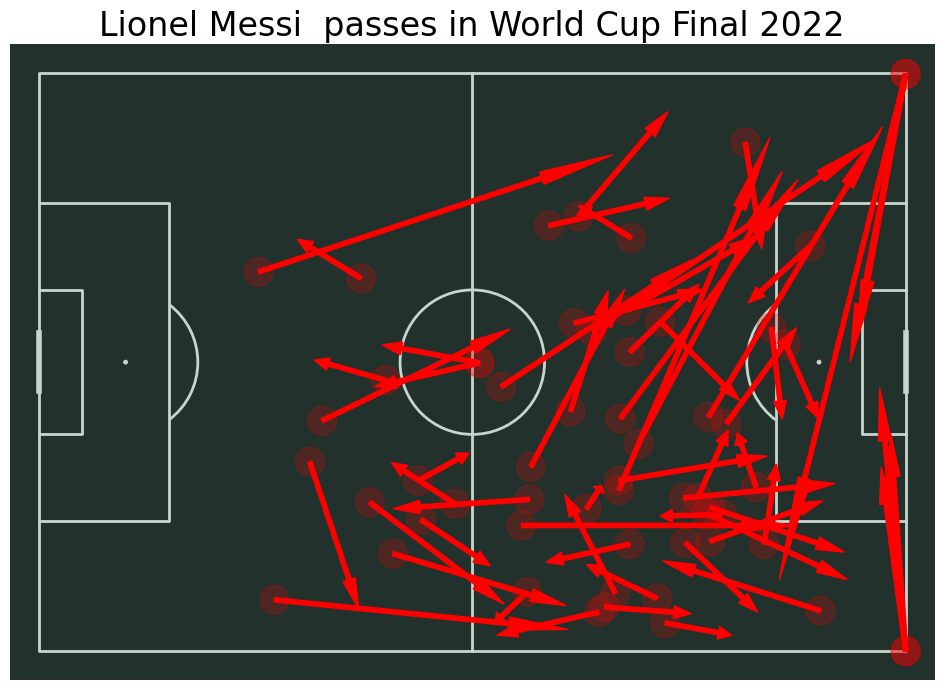

In [28]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

# Create a pitch object
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(10, 7))

#Size of the pitch in yards (!!!)
pitchLengthX = 120
pitchWidthY = 80

for i, thepass in passes.iterrows():
    #if pass made by Lionel Andrés Messi Cuccittini
    if thepass['player_name'] == 'Lionel Andrés Messi Cuccittini':
        x = thepass['x']
        y = thepass['y']
        #plot circle
        passCircle = plt.Circle((x, y), 2, color="red")
        passCircle.set_alpha(.2)
        ax.add_patch(passCircle)
        dx = thepass['end_x'] - x
        dy = thepass['end_y'] - y
        #plot arrow
        passArrow = plt.Arrow(x, y, dx, dy, width=3, color="red")
        ax.add_patch(passArrow)

ax.set_title("Lionel Messi  passes in World Cup Final 2022", fontsize=24)
fig.set_size_inches(10, 7)
# Save the figure
fig.savefig("./Outputs/messi_passes.png", dpi=300, bbox_inches="tight")
plt.show()

### Plotting multiple pass maps on one figure
mplsoccer allows to draw multiple plots on one plot. Let's demonstrate how to do that by
plotting passes made by all of argentina's players.
To do so we first filter out players from argentina. We plot 16 pitches in 4 rows and columns. Then, for each
player, on a separate axis, their pass map is plotted. As the last step, we remove unnecessary pitches
(during 2019 World Cup only 3, not 5, changes were allowed) and set the title.

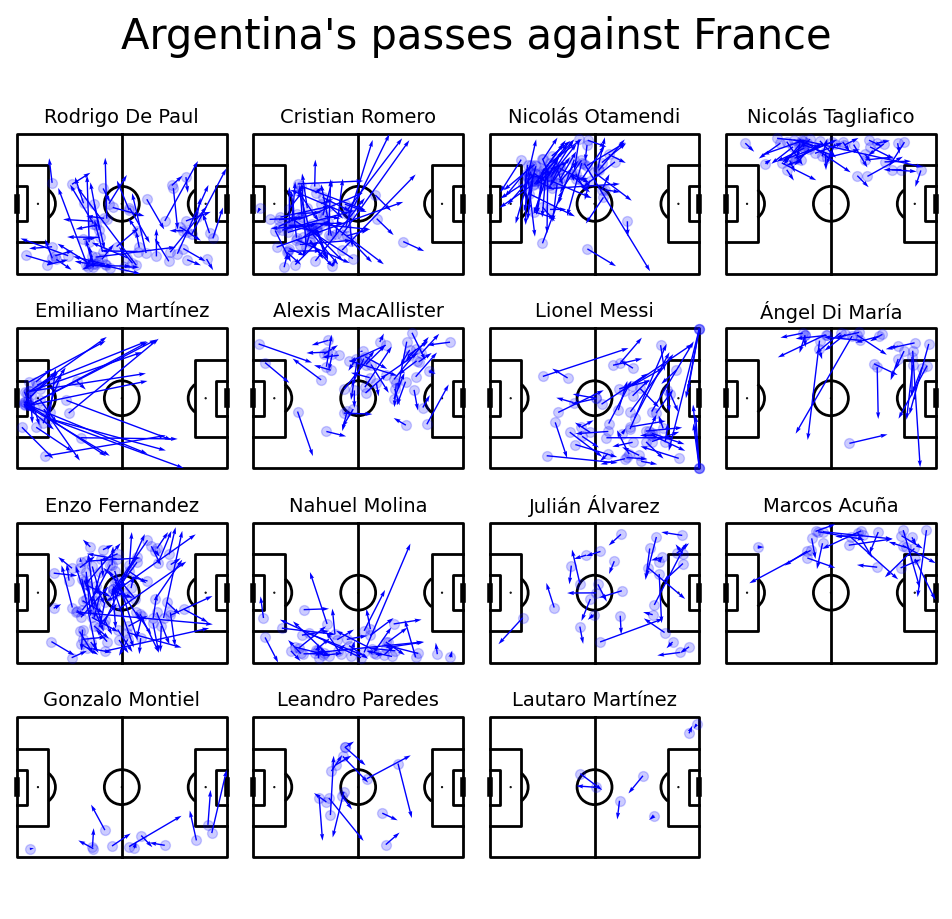

In [21]:
#prepare the dataframe of passes by Argentina that were no-throw ins
mask_Argentina = (df.type_name == 'Pass') & (df.team_name == "Argentina") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_Argentina, ['x', 'y', 'end_x', 'end_y', 'player_nickname']]
#get the list of all players who made a pass
names = df_passes['player_nickname'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_nickname"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Argentina's passes against France", ha='center', va='center', fontsize=30)
# Save the figure 
fig.savefig("./Outputs/argentina_passes.png", dpi=300, bbox_inches="tight")
plt.show()

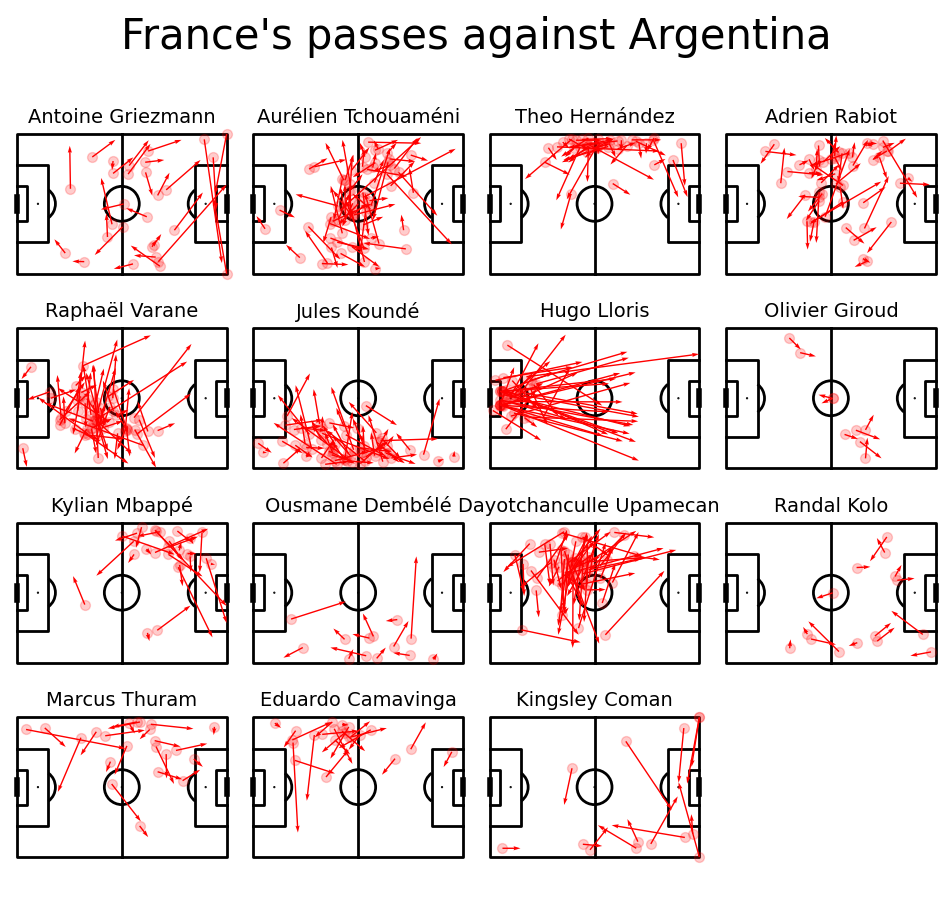

In [30]:
#prepare the dataframe of passes by Argentina that were no-throw ins
mask_France = (df.type_name == 'Pass') & (df.team_name == "France") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask_France, ['x', 'y', 'end_x', 'end_y', 'player_nickname']]
#get the list of all players who made a pass
names = df_passes['player_nickname'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_nickname"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "red", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "red", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "France's passes against Argentina", ha='center', va='center', fontsize=30)
# Save the figure 
fig.savefig("./Outputs/france_passes.png", dpi=300, bbox_inches="tight")
plt.show()

# 🛜 Passing networks

Here we look at how to create a passing network and measure
centralisation. Is one player hogging the ball?

### Preparing the data
For passing networks we use only accurate/successful passes made by a team until the first substitution.
This is mainly just to get going and there are several possible variations of this.
We need information about pass start and end location as well as player who made and received the pass.
To make the vizualisation clearer, we annotate the players using their surname.
(But
can cause problems.For example, Leo Messi's name in Statsbomb is Lionel Andrés Messi Cuccittini. So the
name Cuccittini will come up if you run this code on his matches!
to resolve it you can merge df with df_lineup as in that dataframe player_nickname is available!!
I have not done to keep the code simpler and concise).



In [31]:
#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Argentina"].iloc[0]["index"]
#make df with successfull passes by Argentina until the first substitution
mask_Argentina = (df.type_name == 'Pass') & (df.team_name == "Argentina") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
df_pass = df.loc[mask_Argentina, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])


### Calculating edges width
To calculate edge width we again look at the number of passes between players
We need to group the dataframe of passes by the combination of passer and recipient and count passes between them.
As the last step, we set the threshold ignoring players that made fewer than 2 passes.
You can try different thresholds and investigate how the passing network changes when you change it.
It is recommended that you tune this depedning on the message behind your visualisation.

In [32]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [33]:
#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

### Plotting vertices
Lets first plot the vertices (players) using the *scatter_df* we created previously
As the next step, we annotate player's surname   .      


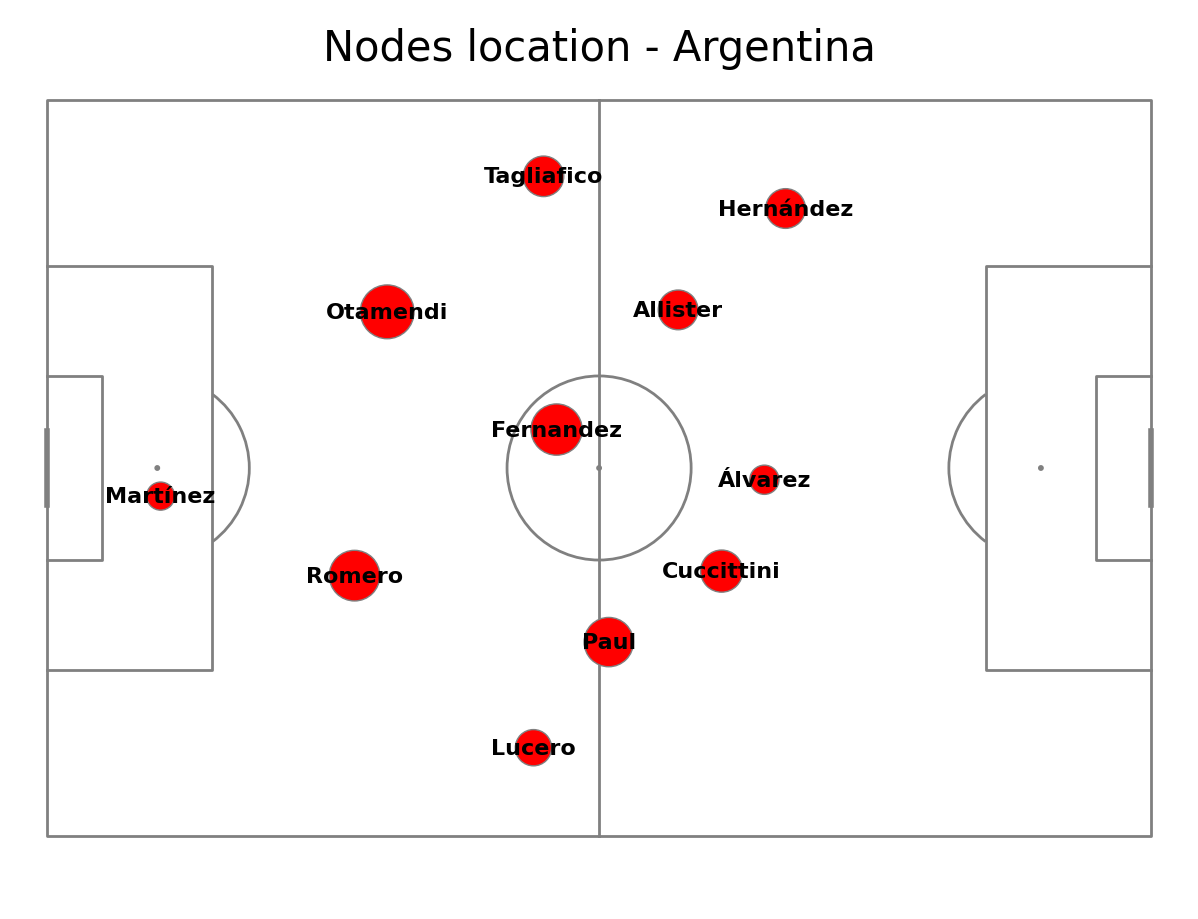

In [34]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - Argentina", fontsize = 30)
# Save the figure   
fig.savefig("./Outputs/argentina_nodes.png", dpi=300, bbox_inches="tight")
plt.show()

### Plotting edges
For each combination of players who made passes, we make a query to *scatter_df* to get the start and end of the line.
Then we adjust the line width so that the more passes between players, the wider the line.
As the next step, we plot the lines on the pitch. It is recommended that zorder of edges is lower than zorder of vertices.
In the end, we make the title.


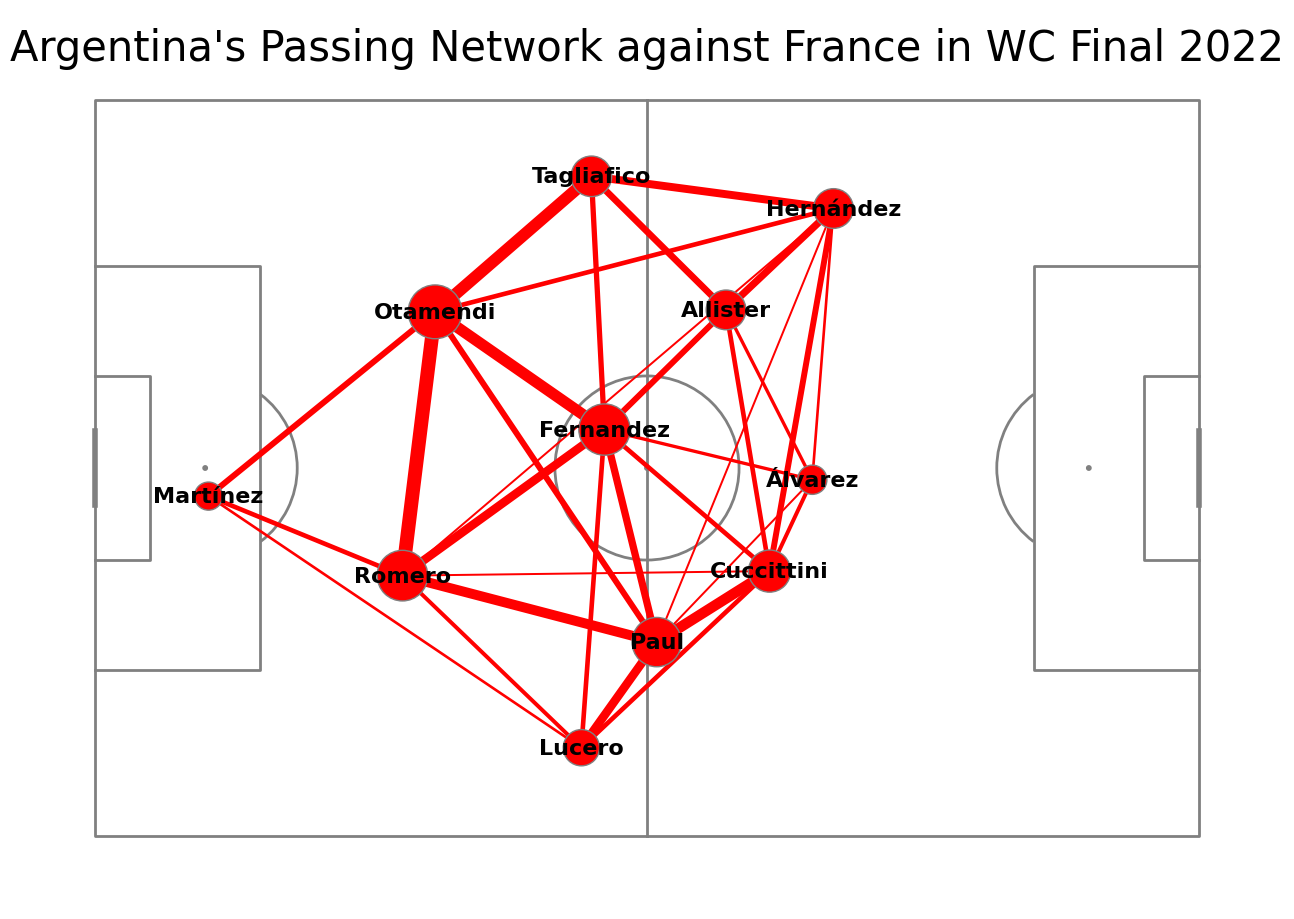

In [36]:
#plot once again pitch and vertices
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='red', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="red", ax = ax["pitch"])

fig.suptitle("Argentina's Passing Network against France in WC Final 2022", fontsize = 30)
# Save the figure
fig.savefig("./Outputs/argentina_network.png", dpi=300, bbox_inches="tight")
plt.show()

In [37]:
#calculate number of successful passes by player
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)

Centralisation index is  0.05868852459016394


In [38]:
#check for index of first sub
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "France"].iloc[0]["index"]
#make df with successfull passes by Argentina until the first substitution
mask_France = (df.type_name == 'Pass') & (df.team_name == "France") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
#taking necessary columns
df_pass = df.loc[mask_France, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
#adjusting that only the surname of a player is presented.
df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])


In [39]:
scatter_df = pd.DataFrame()
for i, name in enumerate(df_pass["player_name"].unique()):
    passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
    recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
    recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

#adjust the size of a circle so that the player who made more passes
scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

In [40]:
#counting passes between players
df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
#setting a treshold. You can try to investigate how it changes when you change it.
lines_df = lines_df[lines_df['pass_count']>2]

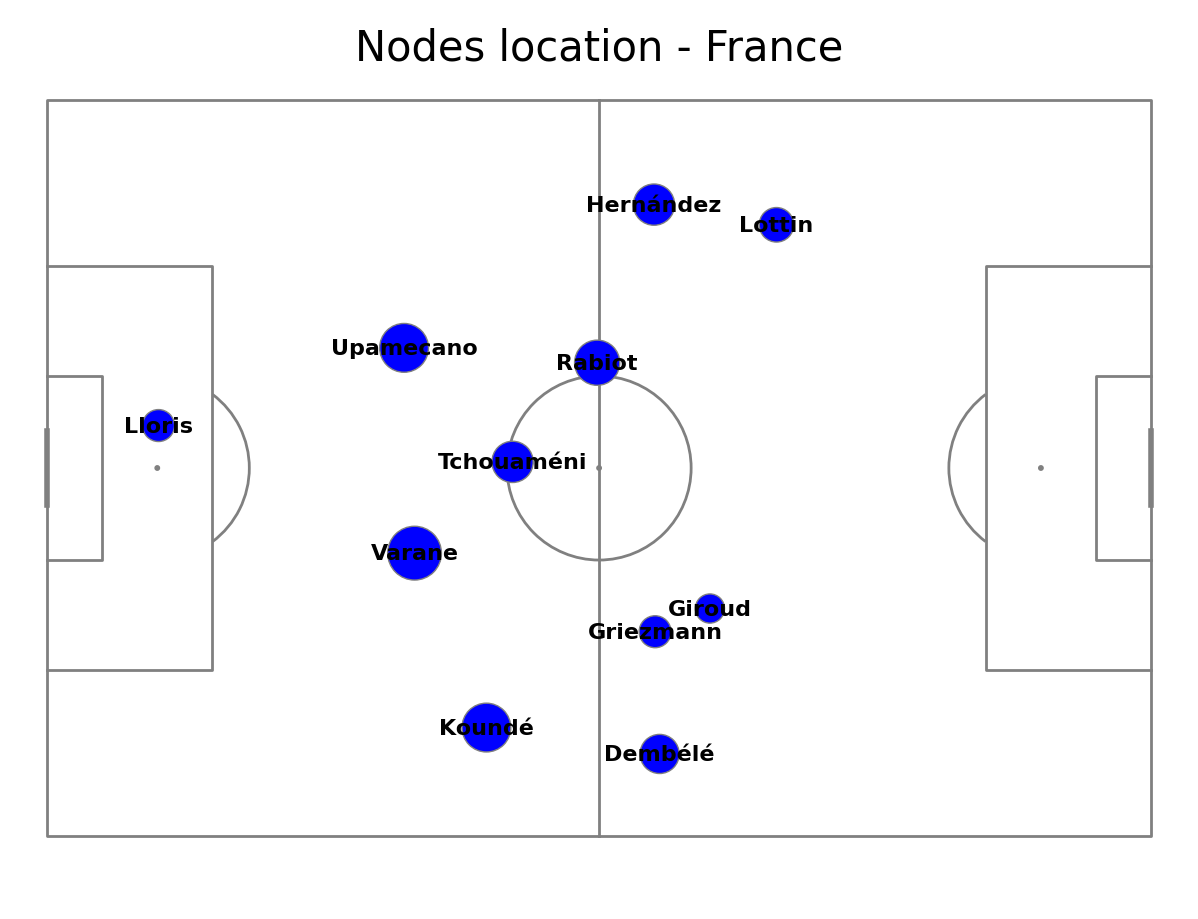

In [41]:
#Drawing pitch
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='blue', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Nodes location - France", fontsize = 30)
# Save the figure
fig.savefig("./Outputs/france_nodes.png", dpi=300, bbox_inches="tight")
plt.show()

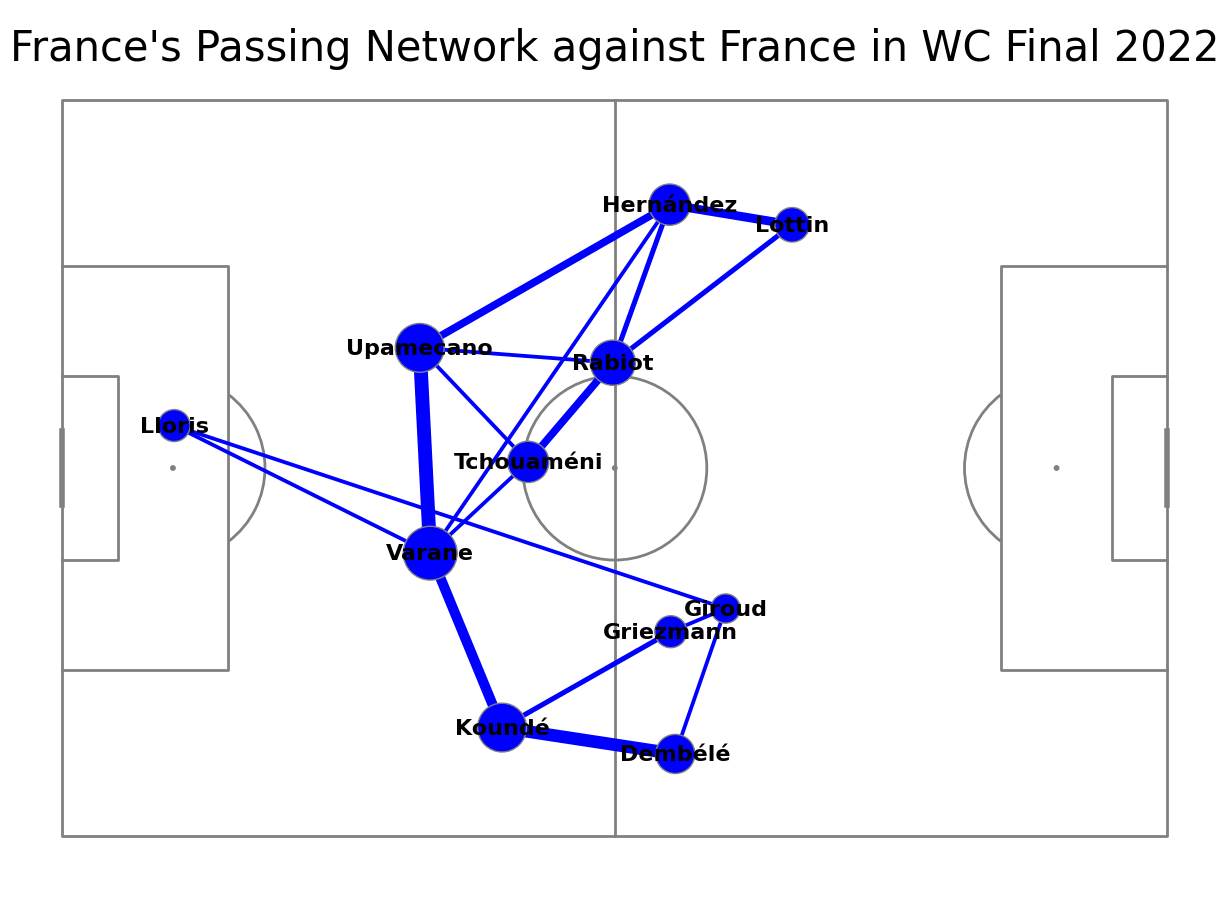

In [42]:
#plot once again pitch and vertices
pitch = Pitch(line_color='grey')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='blue', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

for i, row in lines_df.iterrows():
        player1 = row["pair_key"].split("_")[0]
        player2 = row['pair_key'].split("_")[1]
        #take the average location of players to plot a line between them
        player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
        player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
        player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
        player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
        num_passes = row["pass_count"]
        #adjust the line width so that the more passes, the wider the line
        line_width = (num_passes / lines_df['pass_count'].max() * 10)
        #plot lines on the pitch
        pitch.lines(player1_x, player1_y, player2_x, player2_y,
                        alpha=1, lw=line_width, zorder=2, color="blue", ax = ax["pitch"])

fig.suptitle("France's Passing Network against France in WC Final 2022", fontsize = 30)
# Save the figure   
fig.savefig("./Outputs/france_network.png", dpi=300, bbox_inches="tight")
plt.show()

### Centralisation
To calculate the centralisation index we need to calculate number of passes made by each player.
Then, we calculate the denominator - the sum of all passes multiplied by (number of players - 1) -> 10
To calculate the numerator we sum the difference between maximal number of successful passes by 1 player
and number of successful passes by each player. We calculate the index dividing the numerator by denominator.

In [43]:
#calculate number of successful passes by player
no_passes = df_pass.groupby(['player_name']).x.count().reset_index()
no_passes.rename({'x':'pass_count'}, axis='columns', inplace=True)
#find one who made most passes
max_no = no_passes["pass_count"].max()
#calculate the denominator - 10*the total sum of passes
denominator = 10*no_passes["pass_count"].sum()
#calculate the nominator
nominator = (max_no - no_passes["pass_count"]).sum()
#calculate the centralisation index
centralisation_index = nominator/denominator
print("Centralisation index is ", centralisation_index)

Centralisation index is  0.07



# 🔥🗺️ Pass heat maps

Make a heat map of all teams passes during a tournament.
In order to add context, we set a window for danger
passes to be those in 15 seconds leading up to a shot.

In [44]:
df_match = parser.match(competition_id=43, season_id=106)
#our team
team = "Argentina"
#get list of games by our team, either home or away
match_ids = df_match.loc[(df_match["home_team_name"] == team) | (df_match["away_team_name"] == team)]["match_id"].tolist()
#calculate number of games
no_games = len(match_ids)

### Finding danger passes
First, for each game using mplsoccer parser we open the event data. Note that we use the [0] to store only event data.
Then, for each period in the game we take out shots by argentina and accurate passes by argentina that were not set pieces.
We look for the passes 15 seconds before a shot. That is why we iterate for different periods. If a shot was made in 46th minute
and there were 3 additional minutes in the first half, we would include those passes. Having the danger passes we concatenate them
with a pandas dataframe to store danger passes from all games


In [45]:
#declare an empty dataframe
danger_passes = pd.DataFrame()
for idx in match_ids:
    #open the event data from this game
    df = parser.event(idx)[0]
    for period in [1, 2]:
        #keep only accurate passes by argentina that were not set pieces in this period
        mask_pass = (df.team_name == team) & (df.type_name == "Pass") & (df.outcome_name.isnull()) & (df.period == period) & (df.sub_type_name.isnull())
        #keep only necessary columns
        passes = df.loc[mask_pass, ["x", "y", "end_x", "end_y", "minute", "second", "player_name"]]
        #keep only Shots by argentina in this period
        mask_shot = (df.team_name == team) & (df.type_name == "Shot") & (df.period == period)
        #keep only necessary columns
        shots = df.loc[mask_shot, ["minute", "second"]]
        #convert time to seconds
        shot_times = shots['minute']*60+shots['second']
        shot_window = 15
        #find starts of the window
        shot_start = shot_times - shot_window
        #condition to avoid negative shot starts
        shot_start = shot_start.apply(lambda i: i if i>0 else (period-1)*45)
        #convert to seconds
        pass_times = passes['minute']*60+passes['second']
        #check if pass is in any of the windows for this half
        pass_to_shot = pass_times.apply(lambda x: True in ((shot_start < x) & (x < shot_times)).unique())

        #keep only danger passes
        danger_passes_period = passes.loc[pass_to_shot]
        #concatenate dataframe with a previous one to keep danger passes from the whole tournament
        danger_passes = pd.concat([danger_passes, danger_passes_period], ignore_index = True)

### Plotting location of danger passes
First, we create a pitch using mplsoccer *Pitch* class. Then we scatter them using scatter method.
If you want to investigate the direction of passes, uncomment a line below!



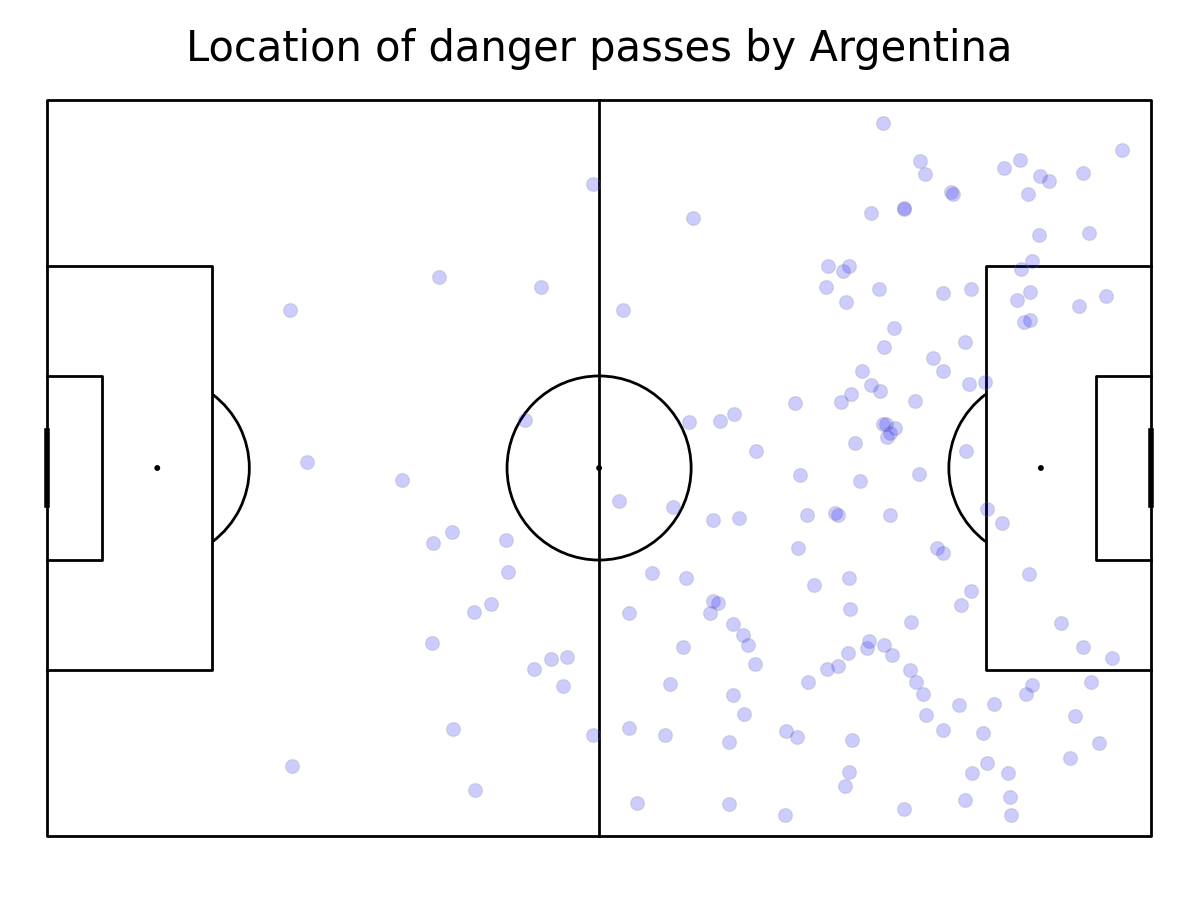

In [46]:
#plot pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#scatter the location on the pitch
pitch.scatter(danger_passes.x, danger_passes.y, s=100, color='blue', edgecolors='grey', linewidth=1, alpha=0.2, ax=ax["pitch"])
#uncomment it to plot arrows
#pitch.arrows(danger_passes.x, danger_passes.y, danger_passes.end_x, danger_passes.end_y, color = "blue", ax=ax['pitch'])
#add title
fig.suptitle('Location of danger passes by ' + team, fontsize = 30)
# Save the figure   
fig.savefig("./Outputs/danger_passes.png", dpi=300, bbox_inches="tight")
plt.show()

### Making a heat map
To make a heat map, first, we draw a pitch. Then we calculate the number of passes in each bin using *bin_statistic* method.
Then, we normalize number of passes by number of games. We plot a heat map and then, we make a legend. As the last step, we add
the title.


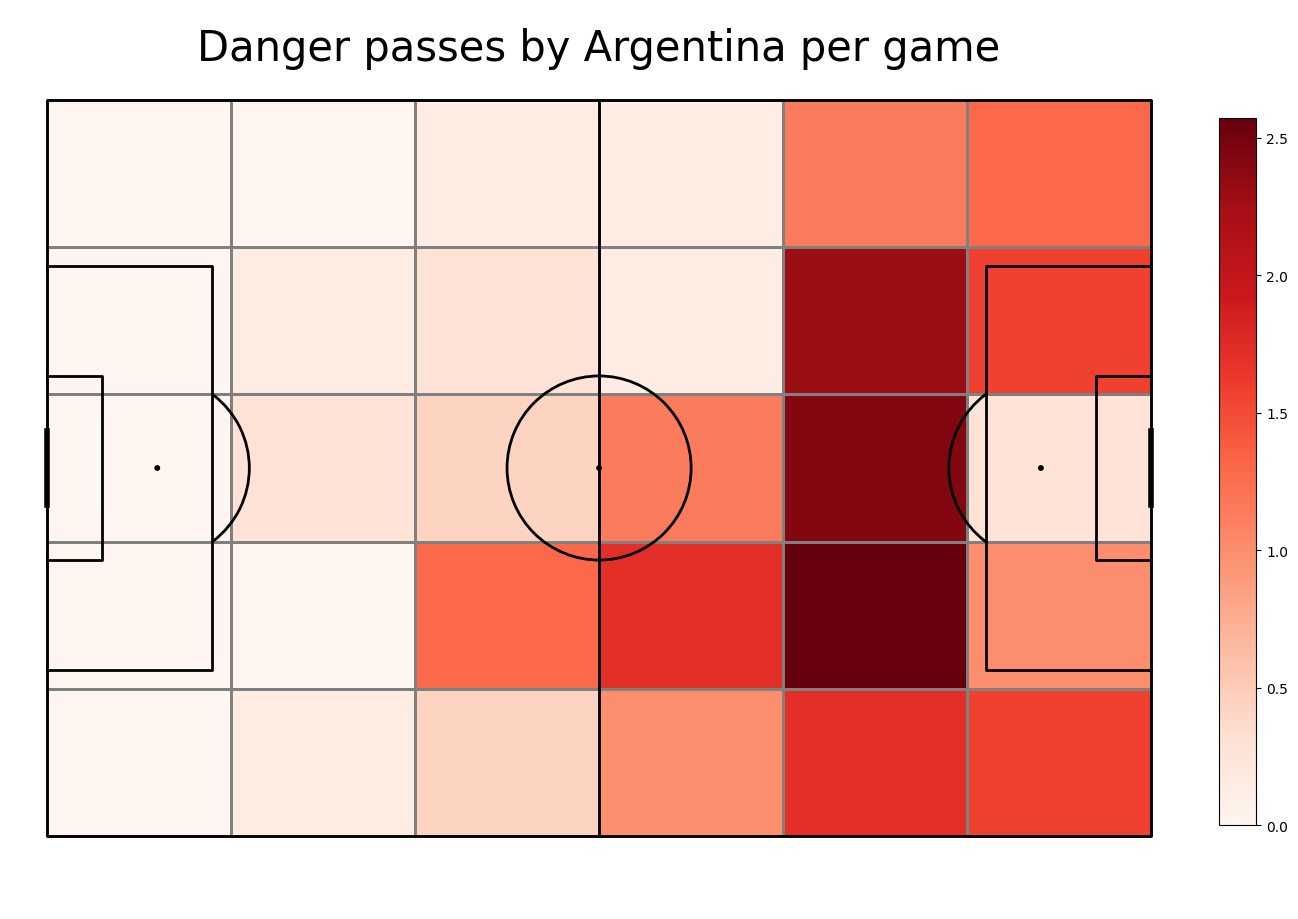

In [47]:
#plot vertical pitch
pitch = Pitch(line_zorder=2, line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#get the 2D histogram
bin_statistic = pitch.bin_statistic(danger_passes.x, danger_passes.y, statistic='count', bins=(6, 5), normalize=False)
#normalize by number of games
bin_statistic["statistic"] = bin_statistic["statistic"]/no_games
#make a heatmap
pcm  = pitch.heatmap(bin_statistic, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Danger passes by ' + team + " per game", fontsize = 30)
# Save the figure
fig.savefig("./Outputs/danger_passes_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

# <center>The End</center>